In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_alpine_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Alpha-Pinene
0,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.106952
1,0,0.0,0.21444,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.106952
2,1,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,0.106952
3,2,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.106952
4,3,0.0,0.00000,0.0,0.0,0.0,0.145484,0.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0.106952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42967,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390
59996,42970,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390
59997,42971,0.0,0.00000,0.0,0.0,0.0,0.322452,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390
59998,42973,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.021390


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Alpha-Pinene', 'index'], axis = 1)
y = df_knn[['X..Alpha-Pinene']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.10695187],
       [0.10695187],
       [0.10695187],
       ...,
       [0.02139037],
       [0.02139037],
       [0.02139037]])

<AxesSubplot:ylabel='Count'>

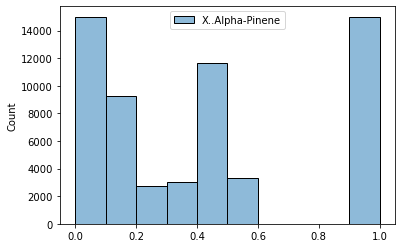

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.04897947200403084

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9436859784051368

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.9039345911977108

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([5.49545587e-04, 1.72334937e-03, 7.59577944e-05, 3.94864923e-04,
       1.90659923e-04, 8.08180485e-04, 8.68203856e-05, 3.69041567e-03,
       1.67122319e-05, 1.13044615e-04, 7.25522451e-05, 1.61102415e-03,
       3.16442192e-05, 6.46721328e-05, 1.17899999e-04, 7.97609851e-04,
       2.69751654e-04, 1.49074433e-04, 6.66672624e-04, 2.93731724e-04,
       6.28244803e-04, 3.80182372e-03, 3.67152183e-04, 2.17942675e-03,
       1.40948110e-04, 2.39575654e-05, 2.14659207e-04, 4.37294619e-05,
       2.01650331e-04, 4.33772946e-05, 1.35301040e-02, 8.24226708e-05,
       3.15931245e-04, 5.13886535e-05, 4.26770564e-04, 6.65043471e-05,
       7.07801838e-05, 1.34296656e-03, 5.18547973e-05, 1.40921396e-04,
       6.86299558e-05, 2.84222640e-04, 9.56307550e-06, 9.09525457e-03,
       1.15408747e-04, 6.46214251e-05, 2.94137502e-03, 4.51823548e-05,
       5.99770302e-04, 9.91480229e-05, 1.35889100e-04, 1.78570283e-05,
       4.40875620e-04, 7.36096618e-05, 1.91258651e-03, 2.34895099e-04,
      

In [16]:
selector.threshold_

0.0021321961620469087

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_7,tfidf_21,tfidf_23,tfidf_30,tfidf_43,tfidf_46,tfidf_78,tfidf_82,tfidf_93,tfidf_97,...,focused,giggly,happy,hungry,relaxed,talkative,blueberry,diesel,earthy,mango
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.152565,0.0,0.000000,0.0,...,0,0,0,1,1,0,0,0,0,0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.152565,0.0,0.000000,0.0,...,0,0,0,1,1,0,0,0,0,0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.253181,0.0,...,1,0,1,0,1,0,0,0,0,0
3,0.0,0.000000,0.0,0.0,0.198545,0.0,0.204993,0.0,0.000000,0.0,...,1,0,1,1,0,0,0,0,0,0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.000000,0.0,0.0,0.000000,0.0,0.312348,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
59996,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.108601,0.0,...,0,0,0,0,0,0,0,0,0,0
59997,0.0,0.349629,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0,1,1,0,0,0,0,0,0,0
59998,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['tfidf_7',
 'tfidf_21',
 'tfidf_23',
 'tfidf_30',
 'tfidf_43',
 'tfidf_46',
 'tfidf_78',
 'tfidf_82',
 'tfidf_93',
 'tfidf_97',
 'tfidf_109',
 'tfidf_119',
 'tfidf_121',
 'tfidf_128',
 'tfidf_136',
 'tfidf_141',
 'tfidf_145',
 'tfidf_149',
 'tfidf_151',
 'tfidf_168',
 'tfidf_173',
 'tfidf_199',
 'tfidf_205',
 'tfidf_207',
 'tfidf_210',
 'tfidf_230',
 'tfidf_233',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_267',
 'tfidf_273',
 'tfidf_280',
 'tfidf_281',
 'tfidf_285',
 'tfidf_303',
 'tfidf_304',
 'tfidf_306',
 'tfidf_309',
 'tfidf_312',
 'tfidf_319',
 'tfidf_329',
 'tfidf_336',
 'tfidf_345',
 'tfidf_349',
 'tfidf_357',
 'tfidf_362',
 'tfidf_370',
 'tfidf_381',
 'indica',
 'sativa',
 'aroused',
 'euphoric',
 'focused',
 'giggly',
 'happy',
 'hungry',
 'relaxed',
 'talkative',
 'blueberry',
 'diesel',
 'earthy',
 'mango']

In [52]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_alpine.pkl")
joblib.dump(selector, "selector_knn_tfidf_alpine.pkl")

['selector_knn_tfidf_alpine.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.0395903683190448

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.008301503580211134

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.09111258738621758

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9561916073990371

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.9380920399884247

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.02456694641605845

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.006335376681137467

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.07959507950330515

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9804828501045545

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9527543122225396

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [53]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_alpine.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_alpine.pkl")

['y_test_knreg_tfidf_alpine.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.023629057002296644

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9593237188555205

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.00543886505212101

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.07374866135816303

In [47]:
y_test

,X..Alpha-Pinene
15281,1.000000
21435,1.000000
44536,0.443850
13518,1.000000
47529,0.113369
...,...
6636,0.010695
25027,0.235294
8294,0.005348
16607,1.000000


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

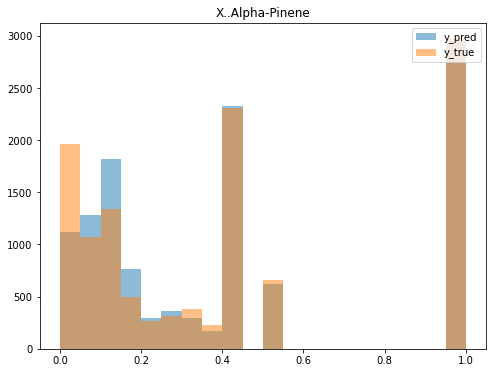

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Alpha-Pinene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_alpine.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.979
P-value: 0.000


<AxesSubplot:>

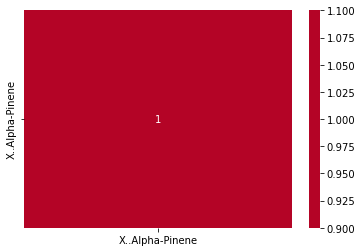

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)